# Homework 2 - How do Taxis move in NYC?

## Imported libraries

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import our_functions as of

# Exploratory Data Analysis

## 1. [RQ1] In what period of the year Taxis are used more? 

In [8]:
df_names=['yellow_tripdata_2018-01.csv','yellow_tripdata_2018-02.csv',
          'yellow_tripdata_2018-03.csv','yellow_tripdata_2018-04.csv',
         'yellow_tripdata_2018-05.csv','yellow_tripdata_2018-06.csv']
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

##### just for Dusica's sad computer--> random sampling of 1mil rows for each .csv file (AKA each month) 

n = 8759874 #number of records in file
s = 1000000 #desired sample size
skip = sorted(random.sample(range(n),n-s))

if 0 in skip:
    skip.remove(0)
    
for i in df_names:
    yellow_tripdata=pd.read_csv('data/'+str(i),skiprows=skip)
    yellow_tripdata.to_csv(str(i))

In [9]:
list_DataFrames=[]

In [10]:
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv',usecols=['Borough','LocationID'])
for i in df_names:
    list_DataFrames.append(
        pd.merge(pd.read_csv('data/'+str(i),usecols=['PULocationID','tpep_pickup_datetime'],parse_dates=['tpep_pickup_datetime'])
                 ,taxi_zone_lookup, how="left",left_on="PULocationID",right_on="LocationID"))

In [ ]:
#all_data=pd.concat(list_DataFrames)

In [14]:
# Per esempio giugno
list_DataFrames[5].head()

,tpep_pickup_datetime,PULocationID,LocationID,Borough
0,2018-06-01 00:25:17,223,223,Queens
1,2018-06-01 00:39:42,141,141,Manhattan
2,2018-06-01 00:40:22,148,148,Manhattan
3,2018-06-01 00:26:26,114,114,Manhattan
4,2018-06-01 00:16:58,209,209,Manhattan


In [15]:
def plotEachMonthAverageDailuUsageOfTaxiCabs():
    for df in list_DataFrames:
        num_of_days=df.iloc[-1]['tpep_pickup_datetime'].day
        average_number_of_rides=df.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days
        average_number_of_rides.plot(kind='bar')

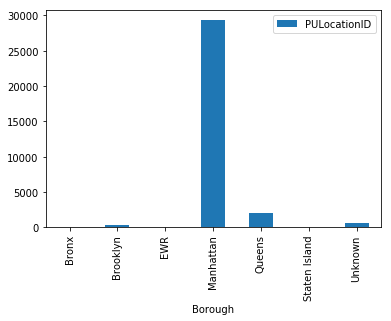

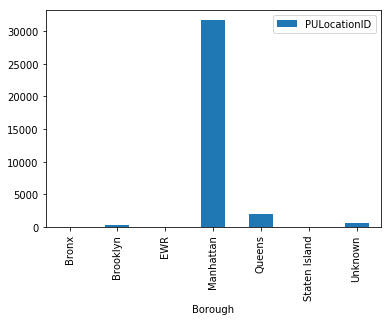

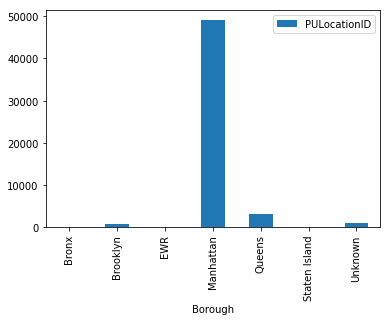

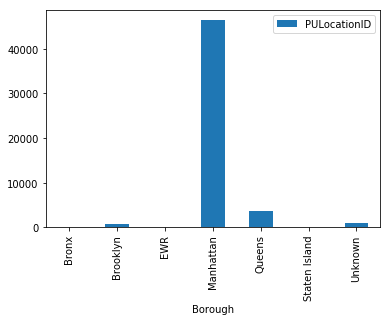

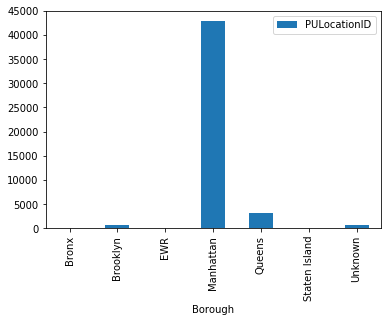

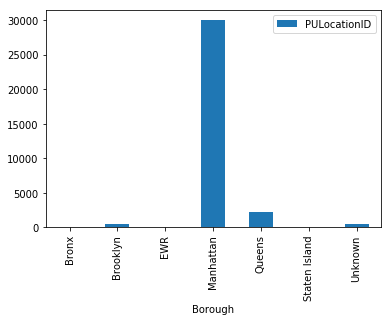

In [16]:
plotEachMonthAverageDailuUsageOfTaxiCabs()

In [87]:
# Does this work at your computer/s?

In [88]:
average_number_of_rides

,PULocationID
Borough,
Bronx,26.903226
Brooklyn,368.451613
EWR,2.193548
Manhattan,29327.322581
Queens,1943.709677
Staten Island,0.548387
Unknown,587.774194


In [109]:
def plotEachMonthAverageDailyUsageOfTaxiCabs():
    average_num_for_all_months=pd.DataFrame()
    list_data=[]
    for df in list_DataFrames:
        num_of_days=df.iloc[-1]['tpep_pickup_datetime'].day
        average_number_of_rides=df.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days 
        list_data.append(average_number_of_rides)
    average_num_for_all_months=average_num_for_all_months.append(list_data)
    #average_num_for_all_months=pd.concat(list_data)
    return average_num_for_all_months

In [133]:
def plotEachMonthAverageDailyUsageOfTaxiCabs():
    average_num_for_all_months=pd.DataFrame()
    list_data=[]
    for i in range(len(list_DataFrames)):
        num_of_days=list_DataFrames[i].iloc[-1]['tpep_pickup_datetime'].day
        average_number_of_rides=list_DataFrames[i].loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days 
        average_number_of_rides['month']=i+1
        list_data.append(average_number_of_rides)
    average_num_for_all_months=average_num_for_all_months.append(list_data)
    #average_num_for_all_months=pd.concat(list_data)
   
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    ax = sns.barplot(y="PULocationID", x=average_num_for_all_months.index, data=average_num_for_all_months
                     ,hue='month')
    return ax
    #return average_num_for_all_months

In [126]:
average_number_of_rides['da']=1

In [127]:
average_number_of_rides

,PULocationID,da
Borough,,
Bronx,26.903226,1
Brooklyn,368.451613,1
EWR,2.193548,1
Manhattan,29327.322581,1
Queens,1943.709677,1
Staten Island,0.548387,1
Unknown,587.774194,1


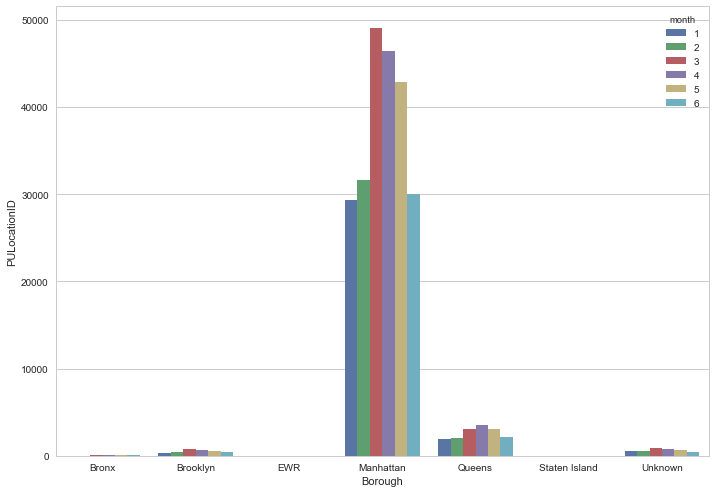

In [134]:
plotEachMonthAverageDailyUsageOfTaxiCabs()

In [110]:
#all_data=pd.concat(list_DataFrames)

# Just for January

In [18]:
yellow_tripdata_january=pd.read_csv('data/yellow_tripdata_2018-01.csv',usecols=['PULocationID','tpep_pickup_datetime'],
                                     parse_dates=['tpep_pickup_datetime'])

merged = pd.merge(yellow_tripdata_january,taxi_zone_lookup, how="left",left_on="PULocationID",right_on="LocationID")
#for numbers of day for each month 

In [48]:
#merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

Some values of dates aren't from the year they are supposed to be. Therefore, they should be removed from the dataset and exclude from the analysis. Even though it is small percentage of this large dataset, data should be cleaned by removing any incosistency and iregularity that is identified before starting with the analysis.

In [54]:
irregular_years=merged.tpep_pickup_datetime[[merged.tpep_pickup_datetime[i].year!=2018 for i in range(len(merged['tpep_pickup_datetime']))]]

In [65]:
len(irregular_years)

37

In [66]:
irregular_years.head()

45    2017-12-31 12:33:49
296   2017-12-31 21:48:24
297   2017-12-31 22:15:21
419   2017-12-31 18:01:08
420   2017-12-31 18:53:22
Name: tpep_pickup_datetime, dtype: datetime64[ns]

In [72]:
merged.tpep_pickup_datetime.shape

(1000001,)

In [78]:
merged=merged[[merged.tpep_pickup_datetime[i].year==2018 for i in range(len(merged['tpep_pickup_datetime']))]]

In [79]:
merged.tpep_pickup_datetime.shape

(999964,)

In [84]:
np.unique(merged.Borough)

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

In [80]:
num_of_days=merged.iloc[-1]['tpep_pickup_datetime'].day
average_number_of_rides=merged.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days

average_number_of_rides

,PULocationID
Borough,
Bronx,26.903226
Brooklyn,368.451613
EWR,2.193548
Manhattan,29327.322581
Queens,1943.709677
Staten Island,0.548387
Unknown,587.774194


In [85]:
#What shall we do with this? :D
len(merged[merged.Borough=='Unknown'])

18221

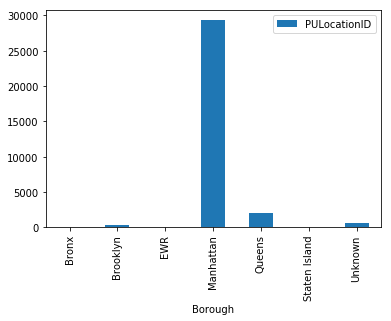

In [81]:
average_number_of_rides.plot(kind='bar')

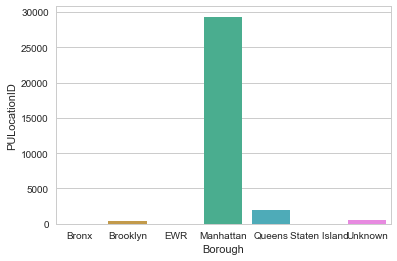

In [86]:
sns.set(style="whitegrid")
ax = sns.barplot(y="PULocationID", x=average_number_of_rides.index, data=average_number_of_rides)

In [ ]:
#below nothing useful 

In [ ]:
#merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

In [ ]:
#merged.loc[:,['Borough','PULocationID','tpep_pickup_datetime']].groupby('Borough').count()

In [ ]:
#average # of rides per day in January 


In [ ]:
#merged.loc[:,['Borough','PULocationID','tpep_pickup_datetime']].groupby('Borough').count()/num_of_days

In [ ]:
#average_number_of_rides=merged.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days

In [ ]:
#merged.drop_duplicates()

sns.set(style="whitegrid")
ax = sns.barplot(y="PULocationID", x=average_number_of_rides.index, data=average_number_of_rides,hue="Borough")

In [ ]:
merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

In [ ]:
merged.Borough.sum()

In [ ]:
merged.count

In [ ]:
average_number_of_rides

In [ ]:
df_names=['yellow_tripdata_2018-01.csv']#,'yellow_tripdata_2018-02.csv',
        #  'yellow_tripdata_2018-03.csv','yellow_tripdata_2018-04.csv',
       #  'yellow_tripdata_2018-05.csv','yellow_tripdata_2018-06.csv']
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

In [ ]:
of.su(3,4)

In [ ]:
# loading yellow_tripdata
data_frames=[]

for i in df_names:
    data_frames.append(pd.read_csv('data/'+str(i),usecols=['PULocationID','tpep_pickup_datetime']))

In [ ]:
data_frames[0].shape

#data=pd.concat(data_frames)
merged = pd.merge(data,taxi_zone_lookup,
                      how="left",left_on="PULocationID",right_on="LocationID")

In [ ]:
gb = df.groupby('ZZ')    
[gb.get_group(x) for x in gb.groups]

In [ ]:
Avg # of trips per each day in January per each borough

In [ ]:
np.unique()

In [ ]:
# loading zone_lookup

csv_lst = ["yellow_tripdata_2018-01",
           "yellow_tripdata_2018-02",
           "yellow_tripdata_2018-03",
           "yellow_tripdata_2018-04",
           "yellow_tripdata_2018-05",
           "yellow_tripdata_2018-06"]


# for i in range (len(csv_list())):
    # ds = pd.read_csv(...)
    
    
    # dataframes = manage the data for the task :
        # clean data() -> filter wrong years, wrong month, NaN values
    
    # work
        
    
taxi_zone_lookup =pd.read_csv('taxi_zone_lookup.csv',sep=',')

## January 

In [ ]:
yellow_tripdata_january.head()

In [ ]:
# loading yellow_tripdata

yellow_tripdata_january=pd.read_csv('yellow_tripdata_2018-01.csv')


## Descriptive statistics

In [ ]:
# merging the two dataframes

merged = pd.merge(yellow_tripdata_january,taxi_zone_lookup,
                      how="left",left_on="PULocationID",right_on="LocationID")


# compute the duretion for each trip
merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])
merged['tpep_dropoff_datetime']=pd.to_datetime(merged['tpep_dropoff_datetime'])
merged['duration'] = merged['tpep_dropoff_datetime'] - merged['tpep_pickup_datetime']


merged.drop(['VendorID','DOLocationID','store_and_fwd_flag',
             'extra','mta_tax','tip_amount','tolls_amount',
             'tpep_dropoff_datetime'],axis=1,inplace=True)


In [ ]:
del yellow_tripdata_january

In [ ]:
#merged_jan['RatecodeID']=pd.Series(yellow_tripdata_january['RatecodeID'], dtype='object')

In [ ]:
yellow_tripdata_january.dtypes

In [ ]:
joined_tripdata_january.shape

In [ ]:
joined_tripdata_january.to_csv('farfalla.csv')